CNN: Changed number of filters in the first layer from 32 to 16 and on the second and third layers from 64 to 128, longer execution time, higher accuracy on training data due to enhanced feature extraction but may face a risk of overfitting.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 64ms/step - accuracy: 0.8694 - loss: 0.4298
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 61ms/step - accuracy: 0.9839 - loss: 0.0524
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 93s 73ms/step - accuracy: 0.9883 - loss: 0.0376
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 74s 64ms/step - accuracy: 0.9915 - loss: 0.0263
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 62ms/step - accuracy: 0.9927 - loss: 0.0237
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9865 - loss: 0.0425
Test accuracy: 0.9896000027656555
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


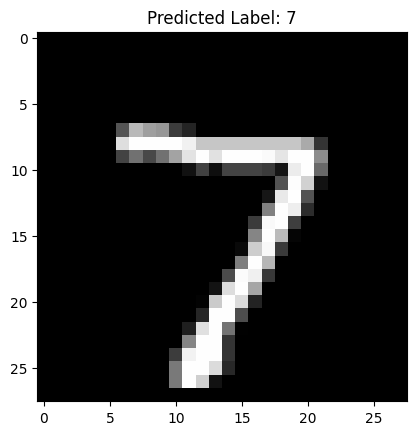

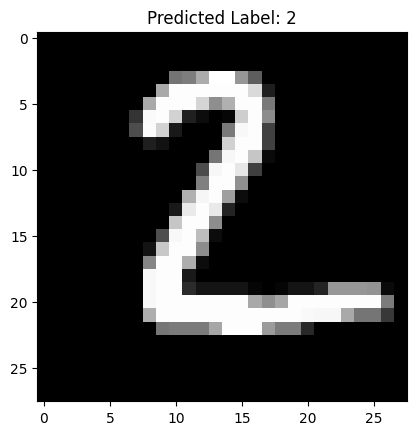

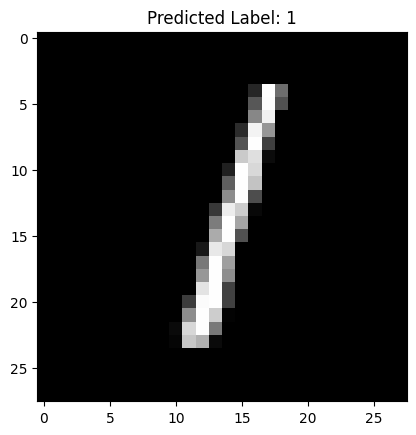

In [ ]:
"""
This code demonstrates how to build and train a simple Convolutional Neural Network (CNN) using the Keras library
with the MNIST dataset. The network is designed to classify images of handwritten digits (0-9).
The dataset is preprocessed, the model is constructed, compiled, and trained,
and finally, the model's performance is evaluated.
"""


import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
# A classification is changed to a binary vector
# Example clases (0,1,2);
# 0 becomes[1,0,0]
# 1 becomes[0,1,0]
# 2 becomes[0,0,1]

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#The data set is already predivided  if not use train_test_split

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
# The normalization of the data improve tthe eficiency of the training and the stability of the model.
# The model Converge faster and avoid numerical problems

test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Changed from 32 to 16
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),  # Changed from 64 to 128
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),  # Changed from 64 to 128
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()


# Compile the model
model.compile(optimizer='adam',
              # Other options of optimizer SGD (Stochastic Gradient Descent),
              #RMSprop,Adagrad, Adam,Adadelta,Nadam
              loss='categorical_crossentropy',
              #categorical_crossentropy: para clasificación multiclase.
              #binary_crossentropy: para clasificación binaria.
              #mean_squared_error: para regresión.
              #mean_absolute_error: para medir el error absoluto.
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64)
#batch_size is the number of samples the network processes before updating the weights during training.

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Predict and display three test images
predictions = model.predict(test_images)
for i in range(3):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted Label: {np.argmax(predictions[i])}')
    plt.show()


 CNN2: kernel size of the Conv2D layers changed from (3, 3) to (5, 5), The larger kernels increase the number of parameters in each convolutional layer, increased the execution time, accuracy increases, however if it captures too many unnecessary details, accuracy may be slightly lower on test data due to overfitting.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 94ms/step - accuracy: 0.3445 - loss: 1.7864
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.5600 - loss: 1.2465
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.6274 - loss: 1.0548
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 86ms/step - accuracy: 0.6675 - loss: 0.9493
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.6983 - loss: 0.8660
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6851 - loss: 0.8973
Test accuracy: 0.6815999746322632
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


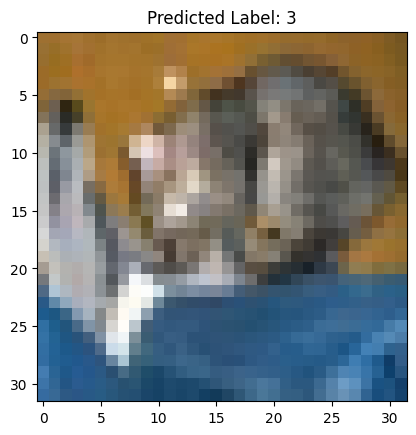

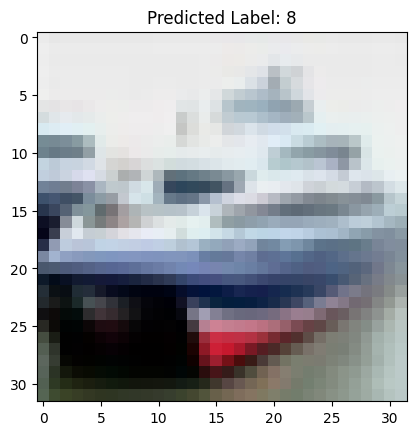

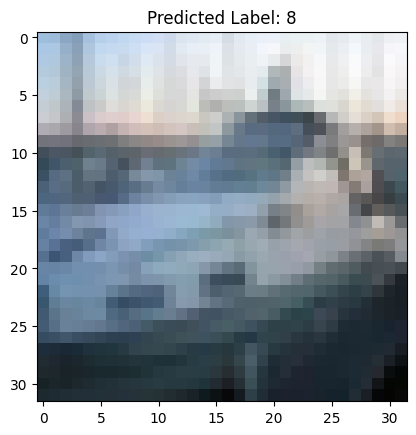

In [ ]:
"""
Este código construye y entrena una red neuronal
convolucional (CNN) usando la biblioteca Keras
con el dataset CIFAR-10. La red está diseñada
para clasificar imágenes de objetos en 10 categorías
diferentes. El dataset se preprocesa, se construye y
compila el modelo, se entrena y finalmente se evalúa
su desempeño.
"""

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Cargar el dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocesar los datos
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Construir el modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)),  # Changed from (3, 3) to (5, 5)
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (5, 5), activation='relu'),  # Changed from (3, 3) to (5, 5)
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_images, train_labels, epochs=5, batch_size=64)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


# Predecir y mostrar tres imágenes de prueba
predictions = model.predict(test_images)
for i in range(3):
    plt.imshow(test_images[i])
    plt.title(f'Predicted Label: {np.argmax(predictions[i])}')
    plt.show()


CNN3: Dropout layers were added after certain convolutional layers with dropout rates of 25% after the first two convolutional layers and 50% before the final dense layer. The added dropout layers increase model robustness by randomly dropping a percentage of neurons during training, which helps prevent overfitting. This adjustment slightly increases training time but improves the models ability to generalize to new data. Accuracy may increase on unseen data, but training accuracy may be lower due to the intentional regularization applied during training.

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 87ms/step - accuracy: 0.3322 - loss: 1.8122
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.5550 - loss: 1.2519
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.6221 - loss: 1.0848
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.6613 - loss: 0.9773
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.6869 - loss: 0.9056
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6673 - loss: 0.9501
Test accuracy: 0.6633999943733215
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


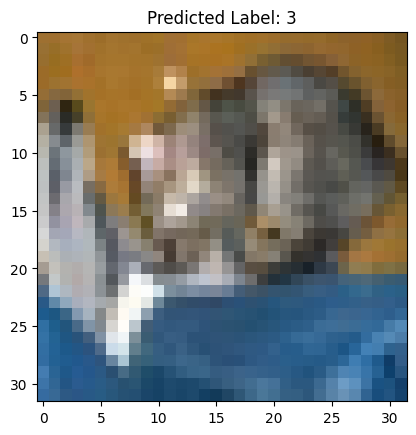

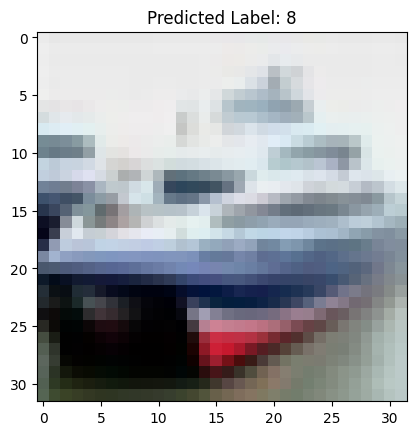

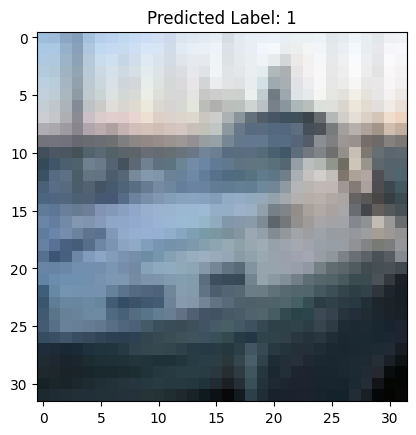

In [ ]:
"""
This code demonstrates how to build and train a simple Convolutional Neural Network (CNN) using the Keras library
with the CIFAR-10 dataset. The network is designed to classify images of objects into 10 categories.
The dataset is preprocessed, the model is constructed, compiled, and trained, and finally, the model's performance is evaluated.
"""


import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocess the data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model with added dropout layers
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Adding a dropout layer with a 25% dropout rate

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Adding another dropout layer with a 25% dropout rate

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Adding a dropout layer before the final dense layer

    layers.Dense(10, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Predict and display three test images
predictions = model.predict(test_images)
for i in range(3):
    plt.imshow(test_images[i])
    plt.title(f'Predicted Label: {np.argmax(predictions[i])}')
    plt.show()


CNN4: changed number of filters in the second convolutional layer from 64 to 32. This reduces the model complexity by decreasing the number of learnable parameters, which reduces training time, memory usage and execution time. This change slightly decreases model accuracy as it reduces the capacity of the layer to capture features.

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 84ms/step - accuracy: 0.3310 - loss: 1.8138
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - accuracy: 0.5422 - loss: 1.2836
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.6123 - loss: 1.1054
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.6487 - loss: 0.9986
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 83ms/step - accuracy: 0.6775 - loss: 0.9294
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - accuracy: 0.6961 - loss: 0.8686
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 87ms/step - accuracy: 0.7154 - loss: 0.8180
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 82ms/step - accuracy: 0.7238 - loss: 0.7788
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.7431 - loss: 0.7355
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.7563 - loss: 0.7049
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.7191 - loss: 0.8260
Test accuracy: 0.7121000289916992
313/313 ━

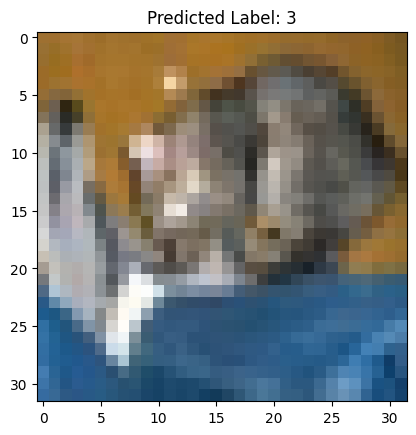

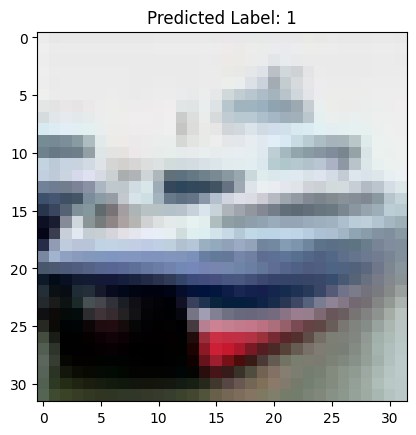

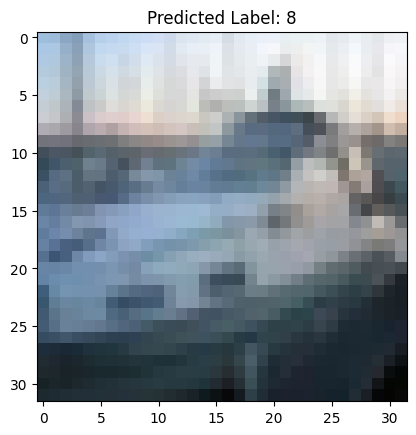

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Cargar el dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocesar los datos
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Construir el modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),  # Changed filters from 64 to 32
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_images, train_labels, epochs=10, batch_size=64)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Predecir y mostrar tres imágenes de prueba
predictions = model.predict(test_images)
for i in range(3):
    plt.imshow(test_images[i])
    plt.title(f'Predicted Label: {np.argmax(predictions[i])}')
    plt.show()



CNN5: the batch size during training was increased from 64 to 128. This reduces the number of weight updates per epoch, which speeds up training but slightly reduces the granularity of weight adjustments. This balances training speed with potential minor effects on test accuracy.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 58ms/step - accuracy: 0.7196 - loss: 0.7709
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - accuracy: 0.8697 - loss: 0.3616
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 59ms/step - accuracy: 0.8903 - loss: 0.3001
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.9037 - loss: 0.2631
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 58ms/step - accuracy: 0.9102 - loss: 0.2428
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 0.9208 - loss: 0.2164
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9249 - loss: 0.1984
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 56ms/step - accuracy: 0.9342 - loss: 0.1808
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 57ms/step - accuracy: 0.9382 - loss: 0.1681
Epoch 10/10
938/938 

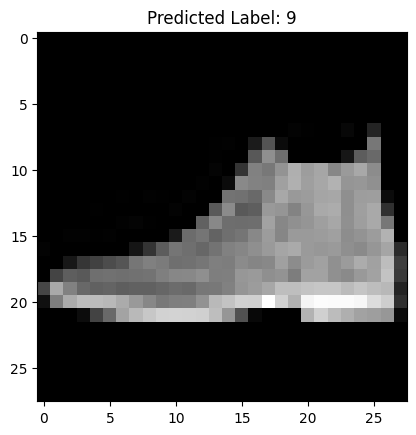

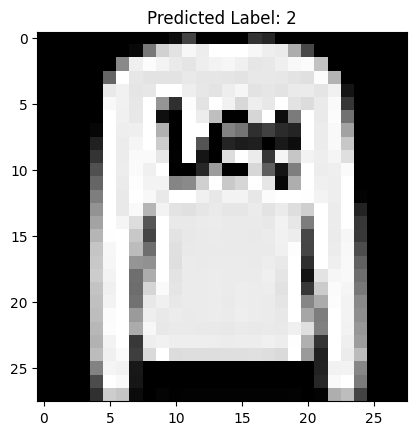

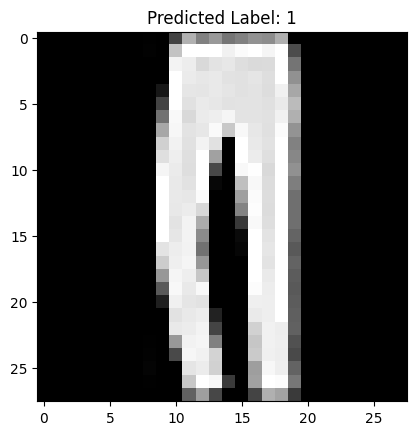

'\nT-shirt/Top\nTrouser\nPullover\nDress\nCoat\nSandal\nShirt\nSneaker\nBag\nAnkle Boot\n'

In [ ]:
"""
This code demonstrates how to build and train a simple Convolutional Neural Network (CNN) using the Keras library
with the Fashion MNIST dataset. The network is designed to classify images of fashion items into 10 categories.
The dataset is preprocessed, the model is constructed, compiled, and trained, and finally, the model's performance is evaluated.
"""
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=128) # increased batch size


# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Predict and display three test images
predictions = model.predict(test_images)
for i in range(3):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted Label: {np.argmax(predictions[i])}')
    plt.show()


"""
T-shirt/Top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle Boot
"""